<a href="https://colab.research.google.com/github/Kushagratandon12/Machine-Learning-Projects/blob/master/Auto_Encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install split-folders
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d prasunroy/natural-images
# !unzip /content/natural-images.zip

In [ ]:
import os
import glob
import random
import numpy as np
import splitfolders
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import layers , losses , optimizers 

Data Analysis Before Auto Encoding

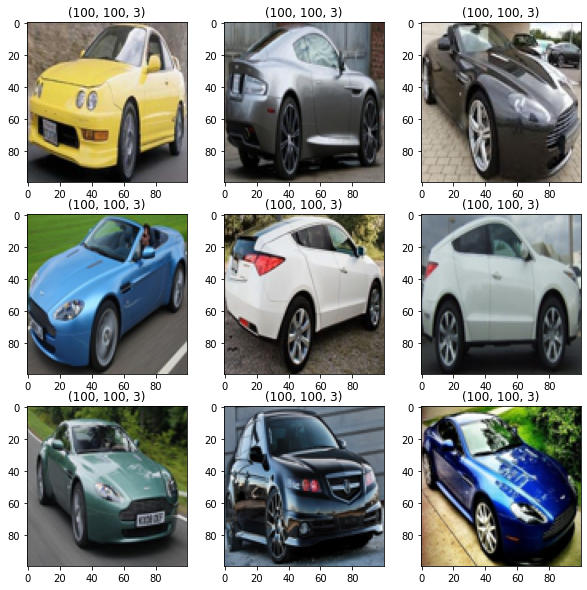

In [ ]:
data_img = glob.glob('/content/Data_Cars/*/*.jpg')
random.shuffle(data_img)
plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  img = plt.imread(data_img[i])
  plt.imshow(img)
  plt.title(img.shape)

In [ ]:
input_data = '/content/drive/MyDrive/Data_Cars'
output_data = '/content/output'
! mkdir /content/output
if len(os.listdir(output_data))==0:
  splitfolders.ratio(input_data, output=output_data,seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 968 files [04:15,  3.78 files/s]


In [ ]:
test_data = '/content/output/test'
training_data = '/content/output/train'
validation_data = '/content/output/val'

IMG_WIDTH = 100
IMG_HEIGHT = 100
IMG_SHAPE=(IMG_WIDTH,IMG_HEIGHT)

image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale = 1/255)

training_datagen = image_data_generator.flow_from_directory(
    training_data,
    target_size=IMG_SHAPE,
    shuffle=True,
)

validation_datagen = image_data_generator.flow_from_directory(
    validation_data,
    target_size=IMG_SHAPE,
    shuffle = True
)

test_datagen = image_data_generator.flow_from_directory(
    test_data,
    target_size=IMG_SHAPE,
    shuffle=True)

x_train = training_datagen[0][0] 
x_validation = validation_datagen[0][0]
x_test = test_datagen[0][0]
# print(training_datagen[0][1])  # Labels -> Images 

Found 774 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


Auto Encoders

In [ ]:
input = layers.Input(shape=(100, 100, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
# x = layers.Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="None", padding="same")(x)
x = layers.Reshape((100,100,3))(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss=losses.MeanSquaredError() , metrics=['accuracy'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 100, 100, 64)      18496 

In [ ]:
autoencoder.fit(
    x_train,x_train,
    epochs=400,
    shuffle=True,
    validation_data = (x_validation,x_validation)
)

Epoch 1/400
1/1 [==============================] - 33s 33s/step - loss: 0.0905 - accuracy: 0.4255 - val_loss: 0.0822 - val_accuracy: 0.4177
Epoch 2/400
1/1 [==============================] - 0s 75ms/step - loss: 0.0901 - accuracy: 0.4179 - val_loss: 0.0819 - val_accuracy: 0.4073
Epoch 3/400
1/1 [==============================] - 0s 73ms/step - loss: 0.0898 - accuracy: 0.4061 - val_loss: 0.0816 - val_accuracy: 0.4166
Epoch 4/400
1/1 [==============================] - 0s 76ms/step - loss: 0.0894 - accuracy: 0.4126 - val_loss: 0.0812 - val_accuracy: 0.4258
Epoch 5/400
1/1 [==============================] - 0s 81ms/step - loss: 0.0890 - accuracy: 0.4182 - val_loss: 0.0807 - val_accuracy: 0.4318
Epoch 6/400
1/1 [==============================] - 0s 75ms/step - loss: 0.0885 - accuracy: 0.4237 - val_loss: 0.0802 - val_accuracy: 0.4366
Epoch 7/400
1/1 [==============================] - 0s 77ms/step - loss: 0.0879 - accuracy: 0.4278 - val_loss: 0.0796 - val_accuracy: 0.4378
Epoch 8/400
1/1 [===

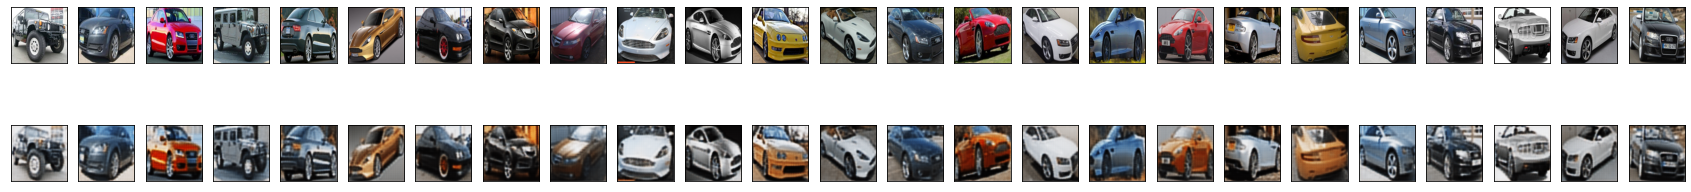

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 8
plt.figure(figsize=(30, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(100, 100,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(100, 100,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()